# Focus stacking with image bunches

Example of focus stacking with automatic alignment and luminosity balance, and partial stacking of image bunches before the final stacking.

In [3]:
import sys
sys.path.append('../')
from focus_stack import *

[INF] noise-map: map noisy pixels, frames in folder: ../tests/img-vignetted                              


noise-map:   0%|          | 0/4 [00:00<?, ?it/s]

[INF] noise-map: hot pixels: rgb: 34, r: 13, g: 18, b: 12                              


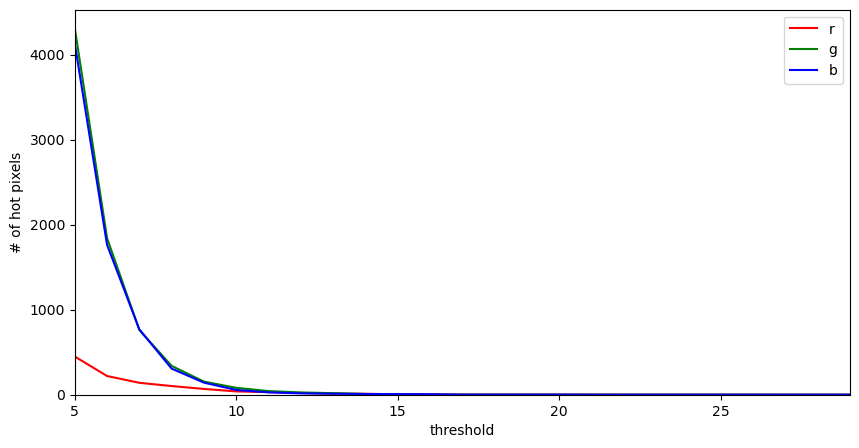

[INF] noise-map: elapsed time: 00:00:00.42s                              
[INF] noise-map: completed                              
[INF] job: elapsed time: 00:00:00.44s                              
[INF] job: completed                              


In [9]:
job = StackJob("job", "../tests")
job.add_action(NoiseDetection("noise-map", input_path=["img-vignetted"]))
job.run()

[INF] test-vig-align: begin run                              
[INF] test-vig-align: : 4 files in folder: ../tests/img-vignetted                              
[INF] test-vig-align: focus stacking                              


test-vig-align:   0%|          | 0/4 [00:00<?, ?it/s]

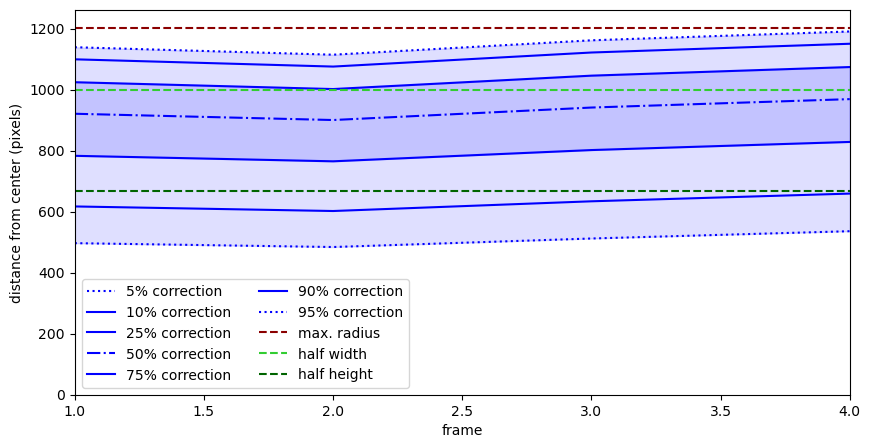

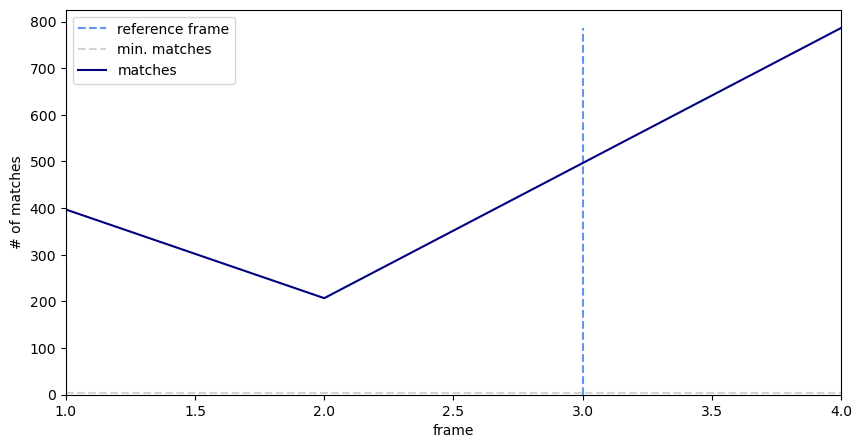

[INF] test-vig-align:                                                                                           


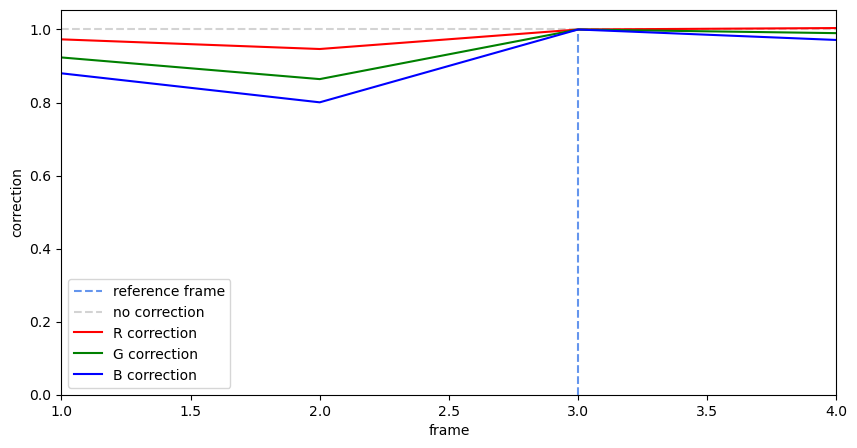

[INF] test-vig-align: elapsed time: 00:00:04.60s                              
[INF] test-vig-align: completed                              
[INF] test-vig-stack: : 4 files in folder: ../tests/test-vig-align                              
[INF] test-vig-stack: focus stacking                              
[INF] test-vig-stack: elapsed time: 00:00:01.35s                                                                              
[INF] test-vig-stack: completed                              
[INF] test-vig-multilayer: merging frames in folder: ../tests/test-vig-stack                              
[INF] test-vig-multilayer: frames: vig-0000_pyr.jpg                              
[INF] test-vig-multilayer: reading files                              
[INF] test-vig-multilayer: writing multilayer tiff test-vig-multilayer/vig-0000_pyr.tif                              


Corrupt JPEG data: 2 extraneous bytes before marker 0xe1


[INF] test-vig-multilayer: elapsed time: 00:00:00.48s                              
[INF] test-vig-multilayer: completed                              
[INF] job: elapsed time: 00:00:06.44s                              
[INF] job: completed                              


In [21]:
job = StackJob("job", "../tests", input_path="img-vignetted")
job.add_action(Actions("test-vig-align",
                       actions=[MaskNoise(), Vignetting(), AlignFrames(),
                                BalanceFrames(channel="RGB", corr_map=MATCH_HIST, mask_size=0.8)]))
job.add_action(FocusStack("test-vig-stack", PyramidStack(), postfix='_pyr', denoise=0))
job.add_action(MultiLayer("test-vig-multilayer", input_path=['test-vig-stack']))
job.run()